<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/World_suicide_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics about suicide are not easy to collate, and may be inaccurate due to the sensitivity of the issue. However,taking into account the existing data I am going to present the analysis on world suicide data from 1985 to 2016. The following features are present in the data:

country-name of the countries
year-year for the suicides recorded
sex-gender
age-age groups
suicides_no-number of suicides for the mentioned age groupes
population-number of individuals in the corresponding age groups
suicides/100k pop-number of suicides per 100k population
country-year-column combining data in columns "country" and "year"
HDI for year-The Human Development Index for given year (a statistic composite index of life expectancy, education, and per capita income indicators)
gdp_for_year - GDP (a monetary measure of all market values of all the goods and services produced in certain period of time)
gdp_per_capita - GDP per person (obtained by dividing its GDP for a particular period by its average population for the year)
generation-generation for each group


https://www.kaggle.com/code/karlentsatinyan/world-suicide-rate-analysis/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Udemy Build 30 Real/master.csv')

In [3]:
file = df.copy()
file.drop ('country-year', axis = 1, inplace = True)
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [4]:
file.describe(include= 'all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,8364.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,NaN,2321,NaN,6
top,Mauritius,NaN,male,15-24 years,NaN,NaN,NaN,NaN,"2,156,624,900",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,0.776601,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,0.093367,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,0.483000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,0.713000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,0.779000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,0.855000,NaN,24874.000000,NaN


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   HDI for year       8364 non-null   float64
 8    gdp_for_year      27820 non-null  object 
 9   gdp_per_capita     27820 non-null  int64  
 10  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [6]:
file.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI for year', ' gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [7]:
file['gdp_for_year'] = file[' gdp_for_year'].str.replace(',','')

In [8]:
file['gdp_for_year']=file['gdp_for_year'].astype('int64')

In [9]:
file.drop(' gdp_for_year', axis = 1, inplace = True)

In [10]:
object_list = ['country', 'sex', 'age', 'generation'] 


for i in object_list:
  file[i] = file[i].astype('category')

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            27820 non-null  category
 1   year               27820 non-null  int64   
 2   sex                27820 non-null  category
 3   age                27820 non-null  category
 4   suicides_no        27820 non-null  int64   
 5   population         27820 non-null  int64   
 6   suicides/100k pop  27820 non-null  float64 
 7   HDI for year       8364 non-null   float64 
 8   gdp_per_capita     27820 non-null  int64   
 9   generation         27820 non-null  category
 10  gdp_for_year       27820 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 1.6 MB


In [12]:
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,796,Boomers,2156624900


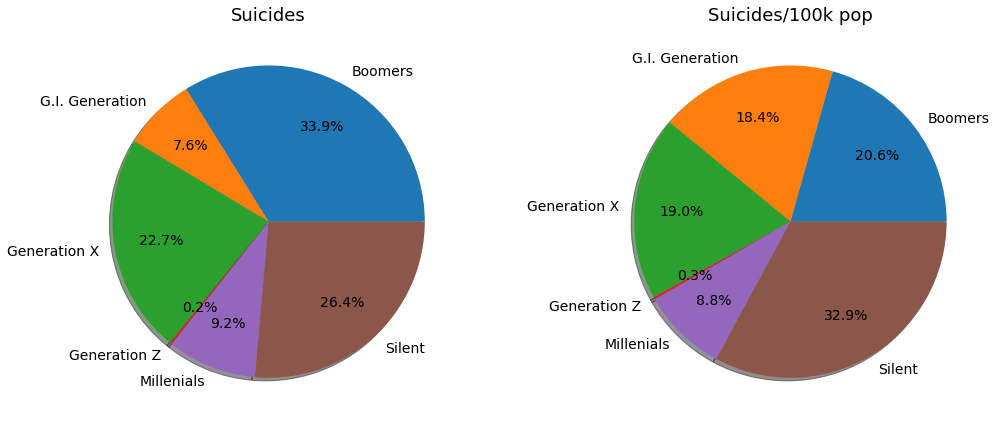

In [13]:
f, ax = plt.subplots (1,2, figsize = (15,6))

grouped_gen1 = file.groupby('generation')['suicides_no'].sum()
x1 = grouped_gen1.index.tolist()
y1 = grouped_gen1.values.tolist()
ax[0].pie(y1, labels=x1, shadow=True, autopct='%1.1f%%', pctdistance=0.7, textprops={'fontsize':14})
ax[0].set_title('Suicides', fontsize = 18, color='k')
grouped_gen2 = file.groupby('generation')['suicides/100k pop'].sum()
x2 = grouped_gen2.index.tolist()
y2 = grouped_gen2.values.tolist()
ax[1].pie(y2, labels = x2, autopct= '%1.1f%%', shadow=True, pctdistance=0.7, textprops={'fontsize':14})
ax[1].set_title('Suicides/100k pop', fontsize = 18, color='k')
plt.tight_layout();

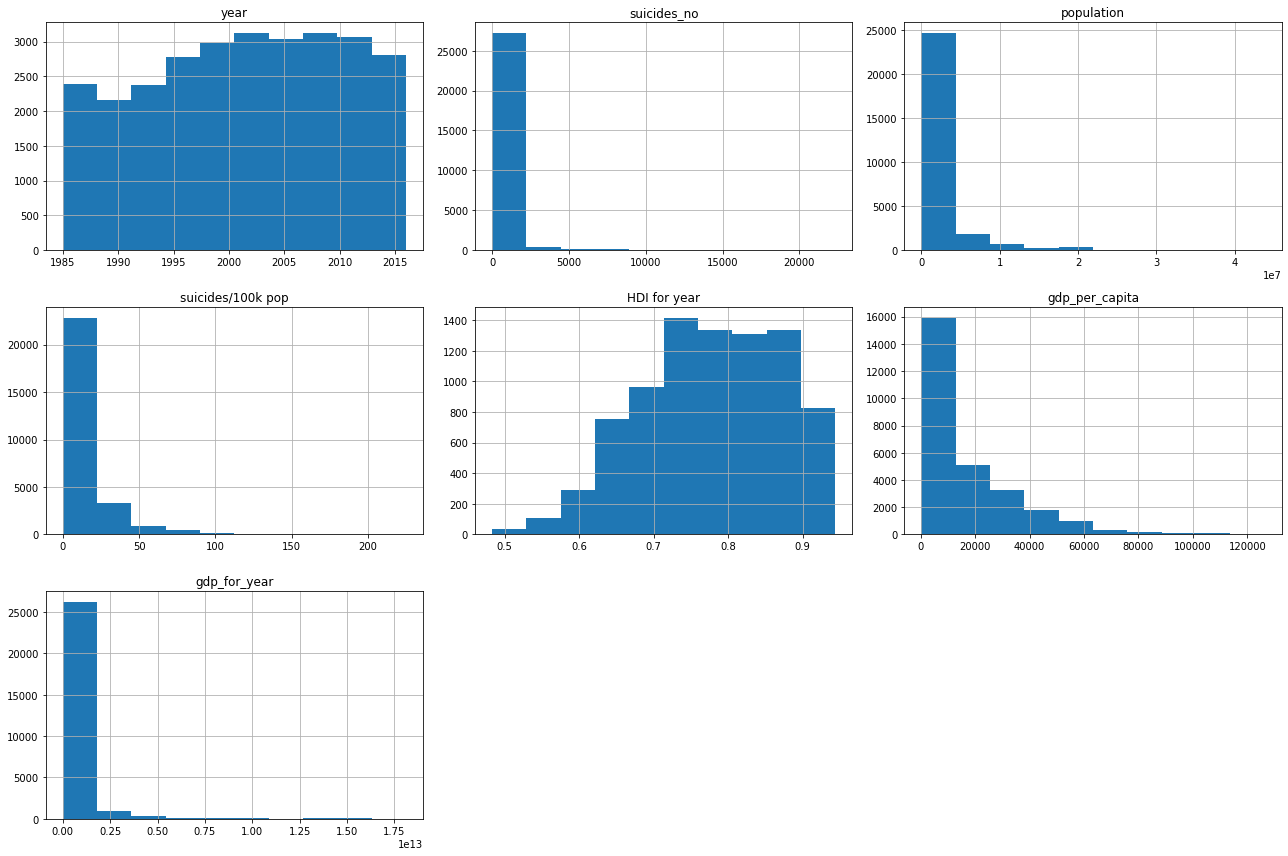

In [14]:
file.hist()
plt.tight_layout(rect=(0,0,3,3))

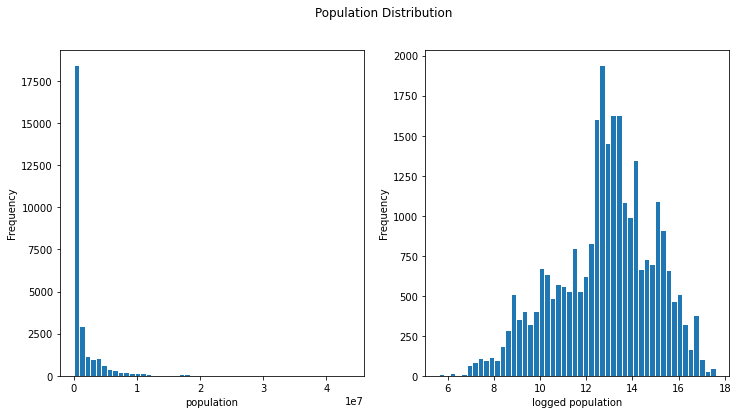

In [15]:
ax1 = plt.subplot(1,2,1)
file['population'].plot.hist(bins = 50, edgecolor='white', figsize=(12,6))
ax1.set_xlabel('population')

ax2 = plt.subplot(1,2,2)
np.log(file['population']).plot.hist(bins=50, edgecolor = 'white', figsize=(12,6))
ax2.set_xlabel('logged population')
plt.suptitle('Population Distribution');

In [16]:
file.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,796,Boomers,2156624900


Text(0.5, 0.98, 'Suicide Distribution in Gender and Age Groups')

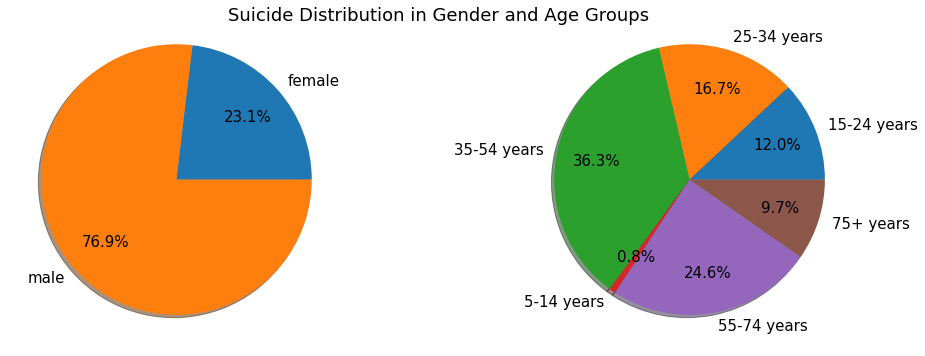

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

gender = file.groupby('sex')['suicides_no'].sum()
x1 = gender.index.tolist()
y1 = gender.values.tolist()
ax1.pie(y1, labels=x1, pctdistance=0.7, autopct = '%1.1f%%', shadow=True, textprops={'fontsize':15})


age = file.groupby('age')['suicides_no'].sum()
x2 = age.index.tolist()
y2 = age.values.tolist()
ax2.pie(y2, labels=x2, pctdistance=0.7, autopct = '%1.1f%%', shadow=True, textprops={'fontsize':15})
plt.tight_layout()
f.suptitle('Suicide Distribution in Gender and Age Groups', fontsize = 18, color='k')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


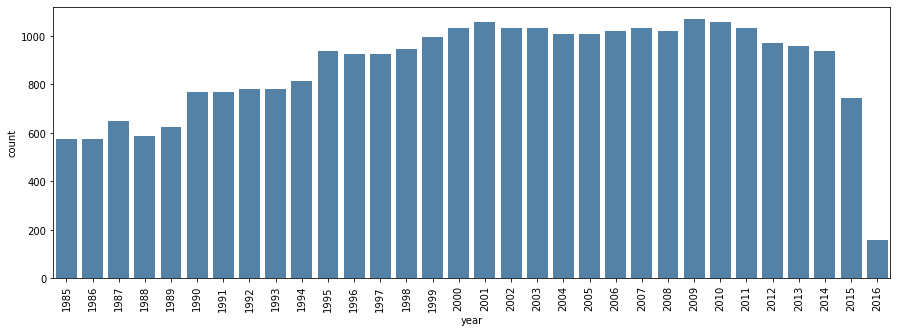

In [18]:
plt.figure(figsize = (15,5))

sns.countplot('year', data = file, color = 'steelblue')
plt.xticks(rotation = 90)
plt.show()

In [19]:
file[file['suicides_no']!=0]

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,796,Boomers,2156624900
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,2309,Generation X,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,2309,Silent,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,2309,Generation Z,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,2309,Generation Z,63067077179


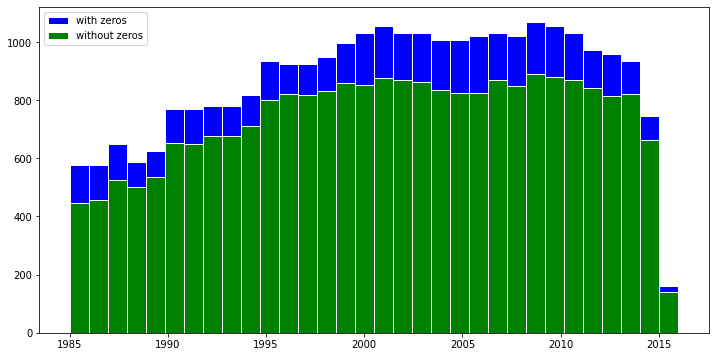

In [20]:
fig = plt.figure(figsize = (12, 6))
file_no_zero = file.copy()
file_no_zero['year_no_zero'] = file_no_zero.loc[(file_no_zero['suicides_no']!=0, 'year')]
plt.hist(file_no_zero["year"], color='blue',edgecolor='white', bins=32)
plt.hist(file_no_zero["year_no_zero"], color='green',edgecolor='white', bins=32)
plt.legend(labels=["with zeros","without zeros"], loc="upper left")
plt.draw()

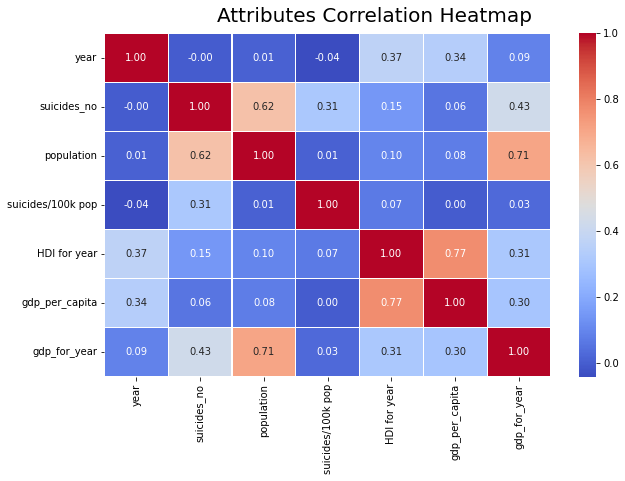

In [22]:
fig, ax = plt.subplots(figsize = (10,6))
corr = file.corr()
sns.heatmap(round(corr,2), annot = True, ax=ax, cmap = 'coolwarm', fmt='.2f', linewidths=.05)
fig.subplots_adjust(top = 0.92)
fig.suptitle('Attributes Correlation Heatmap', fontsize = 20);

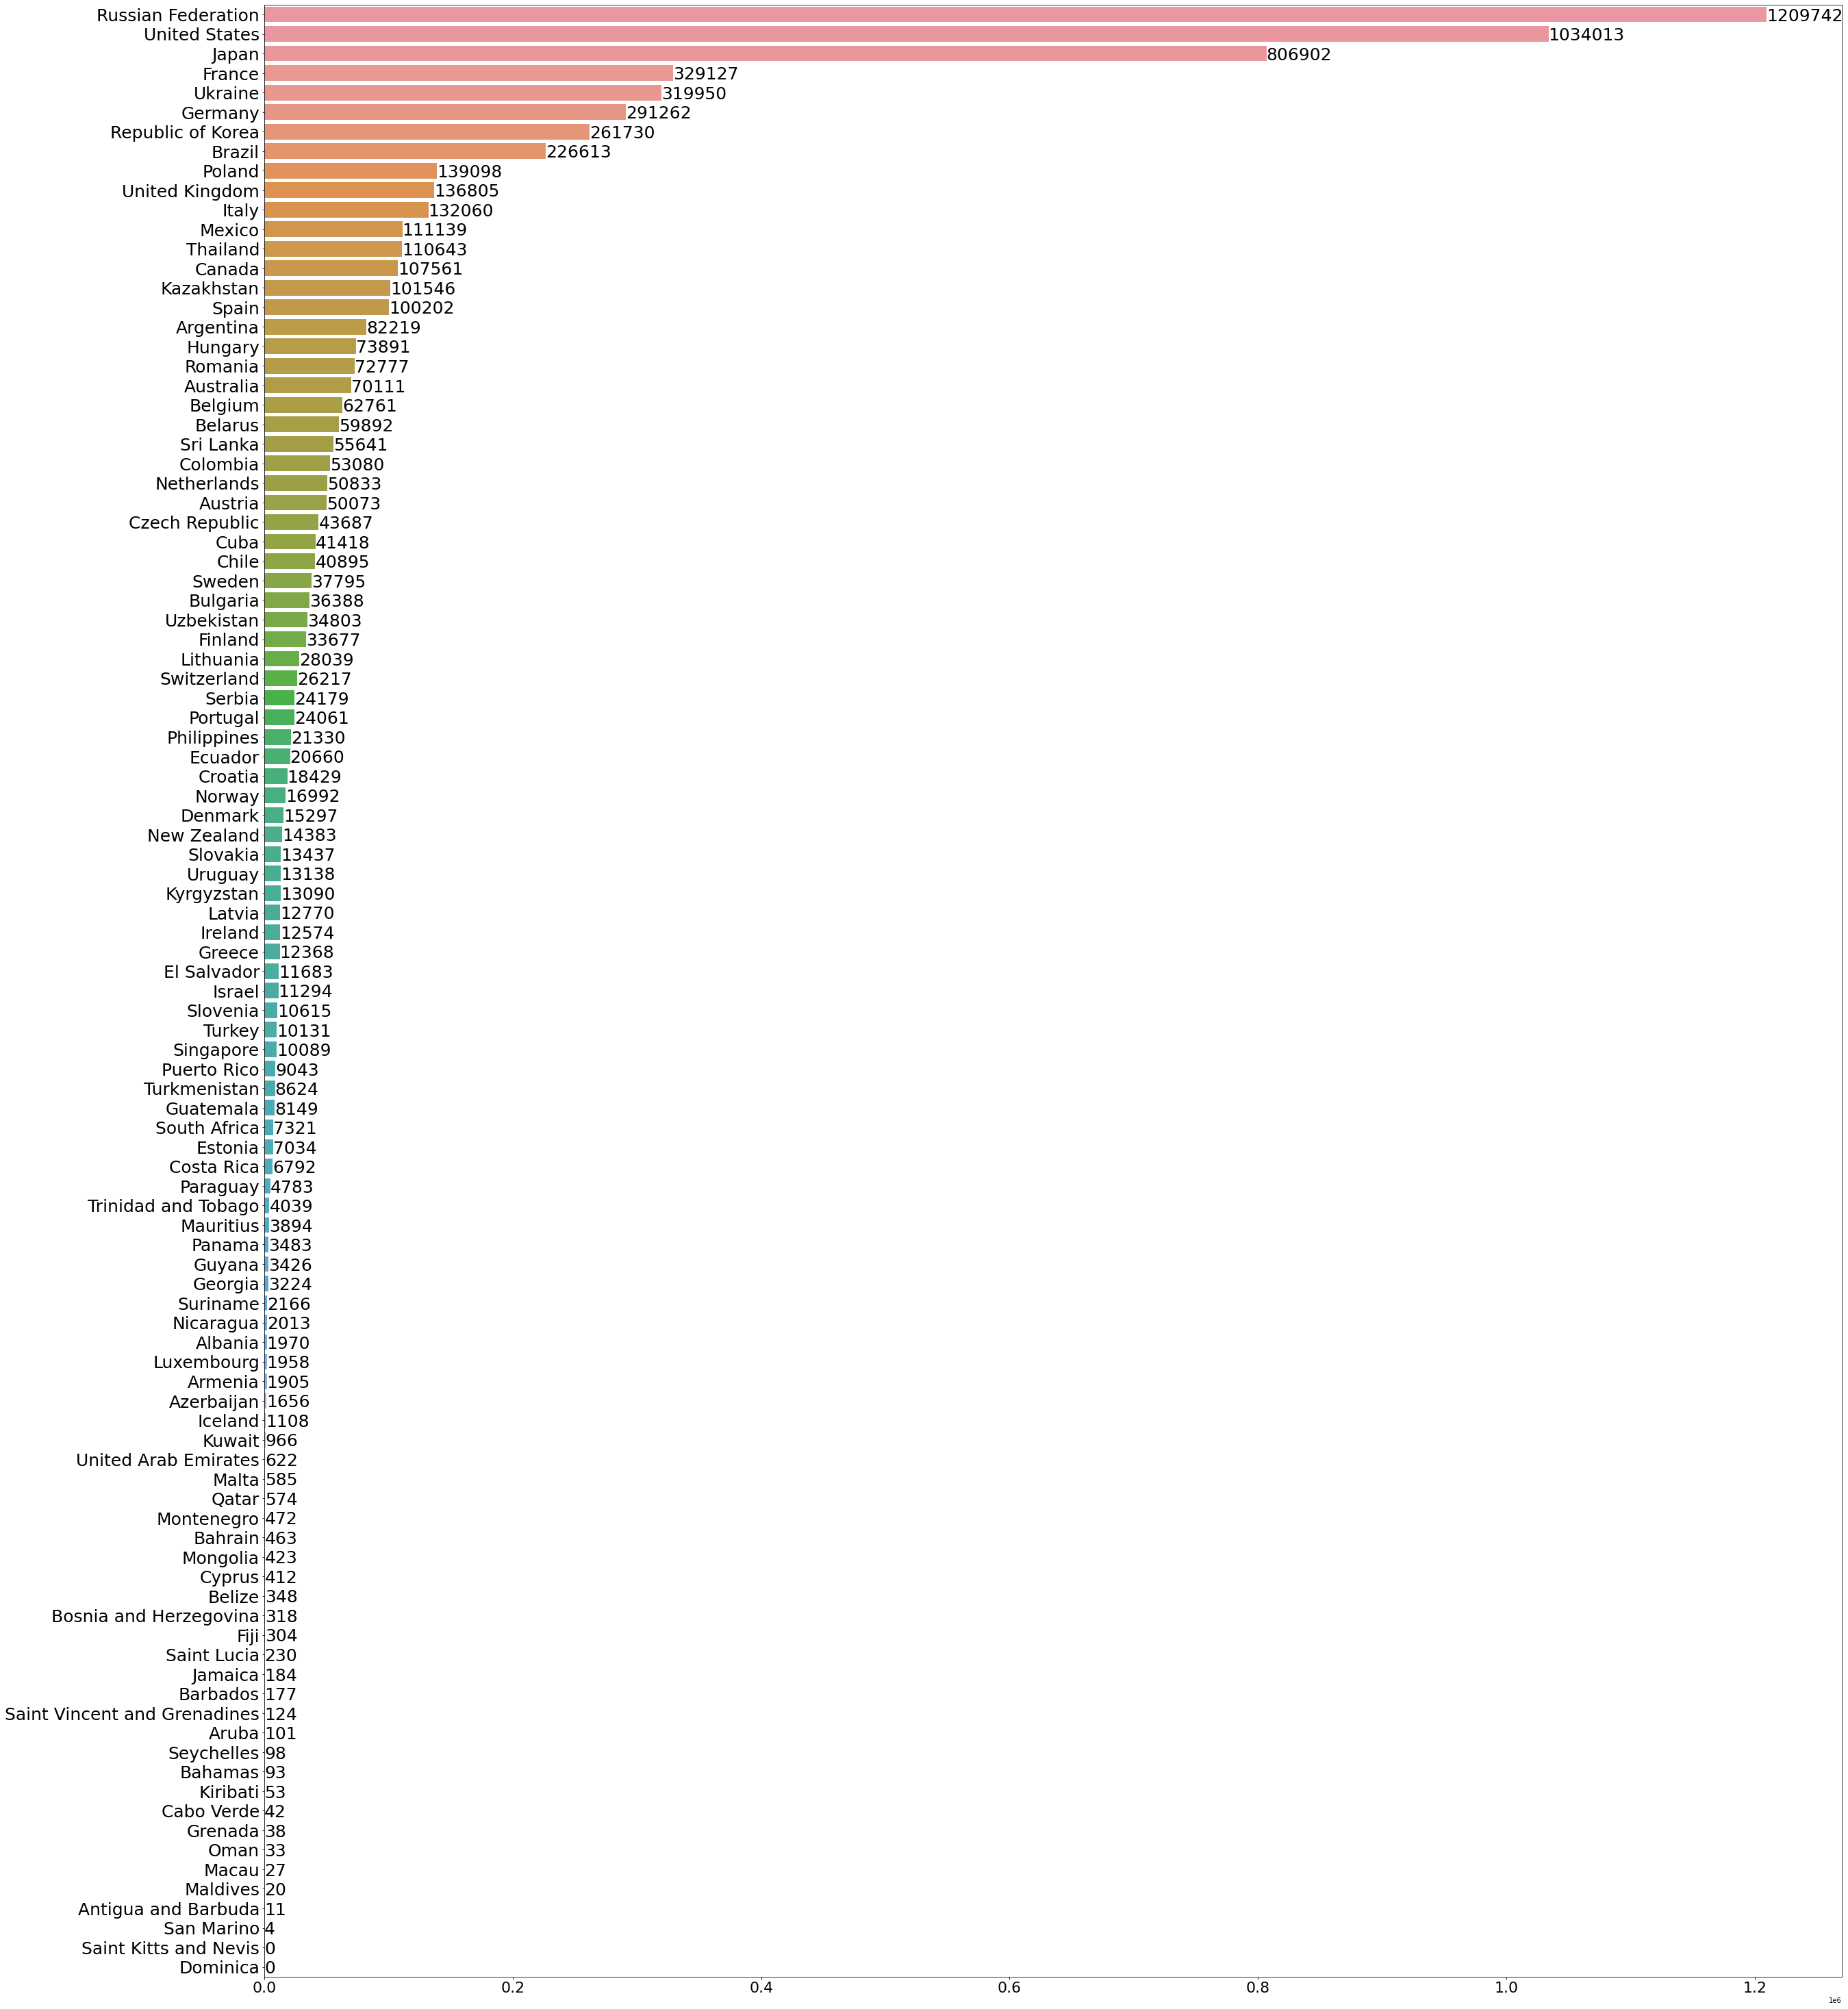

In [59]:
total_suicides = file.groupby('country')['suicides_no'].sum()
total_suicides_df = pd.DataFrame(total_suicides).sort_values(by = 'suicides_no', ascending = False)
ind_list = list(total_suicides_df.index)
plt.figure (figsize=(10,40))
plt.subplots_adjust(left=-7, bottom=0.05, right=-3.8, top=1.05, wspace=-0.5, hspace=0.05)
ax = sns.barplot (y=ind_list, x=total_suicides_df.iloc[:,0].values, data=total_suicides_df, ci=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=25)

for p in ax.patches:
  width = p.get_width()
  plt.text(p.get_width(), p.get_y()+.6*p.get_height(),'{:.0f}'.format(width), ha='left', va='center', fontsize=25)

In [49]:
total_suicides_df.iloc[:,0]

country
Russian Federation       1209742
United States            1034013
Japan                     806902
France                    329127
Ukraine                   319950
                          ...   
Maldives                      20
Antigua and Barbuda           11
San Marino                     4
Saint Kitts and Nevis          0
Dominica                       0
Name: suicides_no, Length: 101, dtype: int64

In [ ]:
plt.figure(figsize = (20,6))
for c in ('Russican Federation', 'United States', 'Republic of Korea')